# _ers-transit Data Checkpoint_: Countrate Images 🧮 🖼

This notebook serves as a quick method of visualising and evaluating countrate images, or more specifically, equivalent data products to those produced by [Stage 1](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_detector1.html#calwebb-detector1) (\*rateints.fits) and [Stage 2](https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_spec2.html#calwebb-spec2) (\*calints.fits) of the [JWST Pipeline](https://jwst-pipeline.readthedocs.io/en/latest/index.html#). 

## Step 0: Import Packages 📦

To begin let's import all the packages we need. Pay particular attention to the ```utils``` package, which is a local python file that is provided with this notebook. 

In [1]:
import utils
import matplotlib.pyplot as plt

## Step 1: Load the Data 💾

Data should be provided in one of the following formats:

    a) A filepath to a directory containing any number of FITS files. 
    or
    b) A filepath to a single FITS file.
    
The instrument your data is from **must** be provided in the primary header under the ```INSTRUME``` keyword. 
    
By default, it is assumed that data is being provided as it would be from the JWST Pipeline. In this case, science data is held in the ```SCI``` extension, and errors in the ```ERR``` extension. However, if your files have different extension names, or if you'd prefer to use the extension indices, the call to the loading function below can be adjusted as necessary. Additionally, when a directory filepath is provided, only files with a ```*calints.fits``` suffix will be searched for. If you have used a different suffix (e.g. ```*rateints.fits```), edit the suffix parameter as necessary. Finally, if you have saved your arrays in a different orientation to the default JWST pipeline / you are using MIRI data, the indices for the x_ax (dispersion), y_ax (cross dispersion), and t_ax (integrations) axes can be defined. 

In summary:

    1) Make sure instrument is provided through 'INSTRUME' keyword in your file(s).
    2) Check provided extensions are correct.
    3) If using a directory filepath, check provided suffix is correct.
    4) If arrays are not shaped like JWST pipeline, define axes.
    
As a final note on using a directory filepath, please ensure that files are named such that a ```sorted(list_of_file_names)``` call would place them in chronological order. 

In [3]:
##### PLEASE COPY YOUR FILEPATH BELOW
filepath1 = "/Users/acarter/Documents/TRANSITS/ERS/DATA_CHALLENGE/SUBMITTED/B-background-subtracted-countrate-images 2/NIRISS-SOSS/Adina Feinstein/"
filepath2 = "/Users/acarter/Documents/TRANSITS/ERS/DATA_CHALLENGE/SUBMITTED/B-background-subtracted-countrate-images 2/NIRISS-SOSS/Michael Radica/"

filepaths = [filepath1, filepath2]
x_axs = [2,2]
y_axs = [1,1]
t_axs = [0,0]
names = ['Adina', 'Michael']
##### ADJUST PARAMETERS AS NECESSARY, SEE ABOVE FOR GUIDANCE
data = utils.Data(filepaths, suffix='.fits', x_ax=x_axs, y_ax=y_axs, t_ax=t_axs, names=names)

## Step 2: Evaluate the Data 🔎

Hopefully your data has been succesfully loaded, and now we can start to look at the results. The precise calculations that will be performed will change a little bit depending on what dataset you are using. Specifically, for NIRCam and NIRISS we have "seed" images that we will compare your datasets against. For MIRI and NIRSpec, we instead use some more generic metrics to intercompare the datasets. 

### a) Basic Properties

This section will pull out some basic properties from your countrate images.

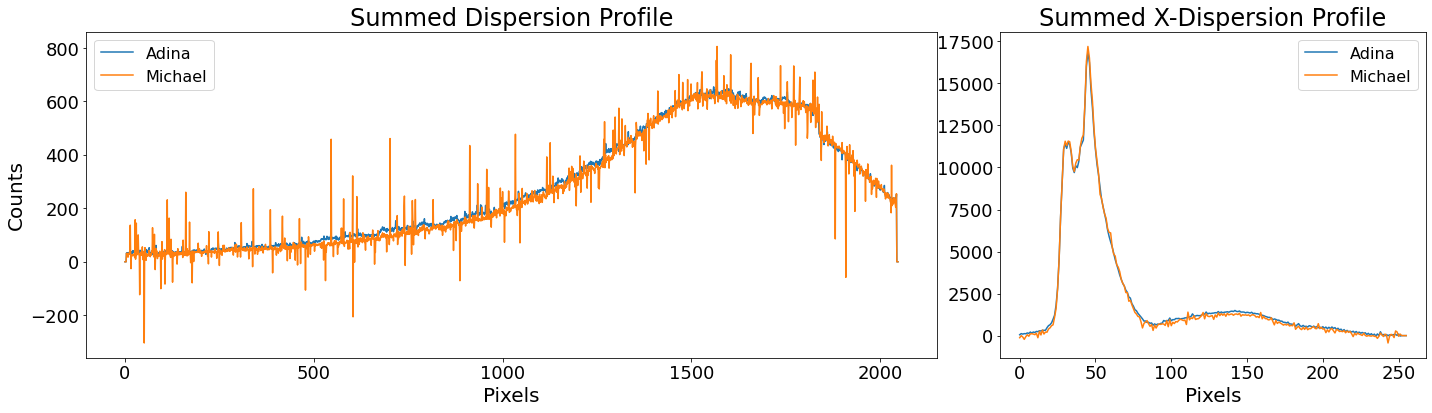

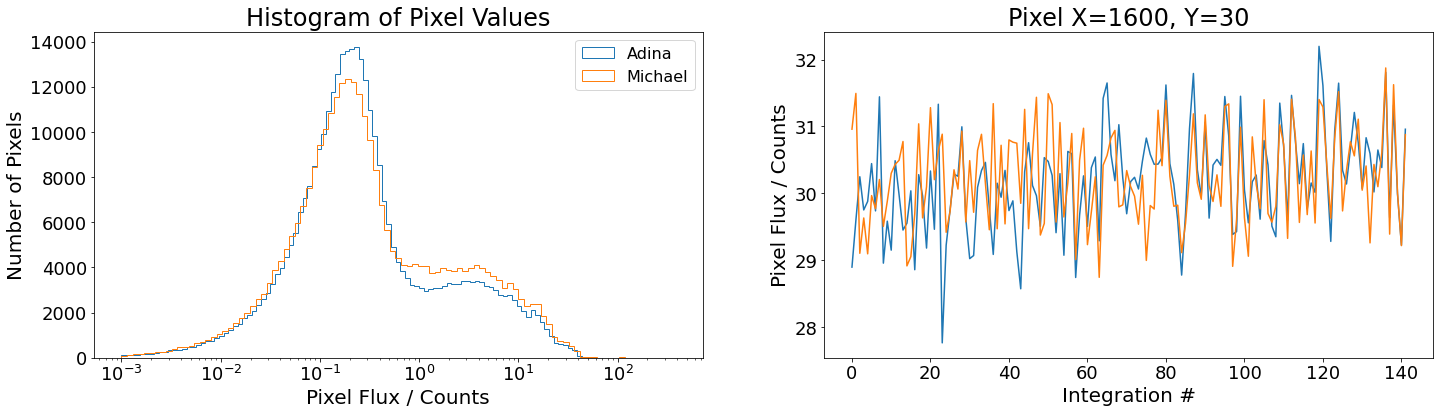

Reductions:  ['Adina', 'Michael']
Mean Values:  [1.09954161 1.05649749]
Median Values:  [0.12243269 0.0665252 ]
Min Values:  [  -9.46826437 -442.30032349]
Max Values:  [ 43.48546546 378.72219849]
Standard Dev Values:  [3.43398682 4.20012649]


In [4]:
data.basic_properties()

### b) Seed Comparison Properties

This will pull out some properties from your images if there is a seed image available to subtract. 

In [ ]:
#seed_dir = '/Users/acarter/Documents/TRANSITS/ERS/DATA_CHALLENGE/DATA/SEED_IMAGES/'
#data.seed_comparison(seed_dir=seed_dir, seed_suffix='rateints.fits')

### c) Bad Pixels

This will assess the occurence of bad pixels in the countrate images.

In [ ]:
#data.bad_pixels()

### c) Save Data

This will compare the dataset to the original seed images (NIRCam and NIRISS only).